In [49]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,  RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error

In [2]:
df = pd.read_csv("C:/Users/Godveen/Guvi/capstoneProjects/train.csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [3]:
# Data Cleaning
# missing values checking
df.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [4]:
# negative value check - no negative value
negative_value_columns = [col for col in df.select_dtypes(include=['number']).columns if (df[col] < 0).any()]
negative_value_columns

[]

In [5]:
# Checking the empty values ('') for all features and target variable - no empty space

#for i in df_address_1.columns:
age_e=[]
job_e=[]
marital_e=[]
edu_e=[]
call_e=[]
day_e=[]
mon_e=[]
dur_e=[]
numcall_e=[]
preout_e=[]
target_e=[]
for index,row in df.iterrows():
    if row["age"] == '':
        age_e.append(index)

    if row["job"] == '':
        job_e.append(index)
        
    if row["marital"] == '':
        marital_e.append(index)

    if row["education_qual"] == '':
        edu_e.append(index)

    if row["call_type"] == '':
        call_e.append(index)

    if row["day"] == '':
        day_e.append(index)
    
    if row["mon"] == '':
        mon_e.append(index)

    if row["dur"] == '':
        dur_e.append(index) 

    if row["num_calls"] == '':
        numcall_e.append(index)

    if row["prev_outcome"] == '':
        preout_e.append(index)

    if row["y"] == '':
        target_e.append(index)

empty_columns=[age_e,job_e,marital_e,edu_e,call_e,day_e,mon_e,dur_e,numcall_e,preout_e,target_e]
for i in empty_columns:
    print(len(i))

0
0
0
0
0
0
0
0
0
0
0


In [6]:
# right format checking - all data in right format
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [7]:
# duplicates removed
df = df.drop_duplicates()
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [8]:
# Outliers Handling - Interquartile Range(IQR) Method
def outlier(df,column):
    q1= df[column].quantile(0.25)
    q3= df[column].quantile(0.75)

    iqr= q3-q1

    upper_threshold= q3 + (1.5*iqr)
    lower_threshold= q1 - (1.5*iqr)

    df[column]= df[column].clip(lower_threshold, upper_threshold)

In [9]:
outlier_columns=["age", "day", "dur", "num_calls"]
for j in outlier_columns:
    outlier(df,j)

y
no     40.797362
yes    41.410096
Name: age, dtype: float64


<AxesSubplot:xlabel='y'>

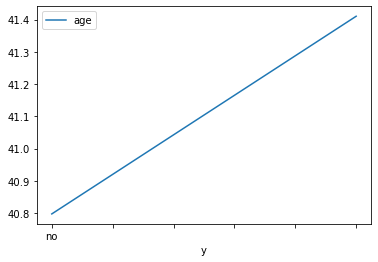

In [10]:
# EDA
print(df.groupby('y')['age'].mean().sort_values())
df.groupby('y')['age'].mean().sort_values().reset_index().plot.line(x='y', y='age')

In [11]:
# Average age of inusrance not brought is 40.8 and Average age of insurance brought is 41.4

In [12]:
# target variable column label encoding
df['y'] = df['y'].map({'yes':1, 'no':0})

job
blue-collar      0.072765
entrepreneur     0.082717
housemaid        0.087903
services         0.088851
technician       0.110585
unknown          0.118056
self-employed    0.118429
admin.           0.122050
management       0.137570
unemployed       0.155027
retired          0.227915
student          0.286780
Name: y, dtype: float64


<AxesSubplot:xlabel='job'>

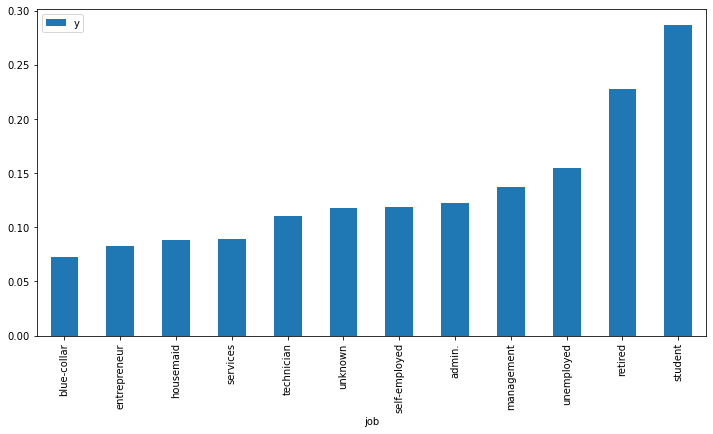

In [13]:
df['job'].unique()
plt.figure(figsize=(12, 6)) 
print(df.groupby('job')['y'].mean().sort_values())
df.groupby('job')['y'].mean().sort_values().reset_index().plot.bar(x='job', y='y', ax=plt.gca())

In [14]:
# we can able to see the order in job column based on insurance brought
# since we have order in the job column, we can label encode the job column

In [15]:
# job column label encoding
df['job'] = df['job'].map({'blue-collar':1, 'entrepreneur':2, 'housemaid':3, 'services':4, 'technician':5, 
                           'unknown':6, 'self-employed':7, 'admin.':8, 'management':9, 'unemployed':10, 'retired':11, 'student':12,})

marital
married     0.101250
divorced    0.119455
single      0.149515
Name: y, dtype: float64


<AxesSubplot:xlabel='marital'>

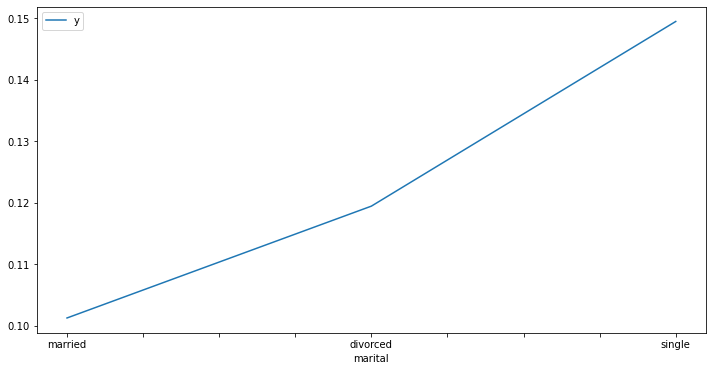

In [16]:
plt.figure(figsize=(12, 6)) 
print(df.groupby('marital')['y'].mean().sort_values())
df.groupby('marital')['y'].mean().sort_values().reset_index().plot.line(x='marital', y='y', ax=plt.gca())

In [17]:
# using plot we can able to see the single category people are more likely to buy insurance

In [18]:
# marital column label encoding
df['marital'] = df['marital'].map({'married':1, 'divorced':2, 'single':3})

education_qual
primary      0.086277
secondary    0.105608
unknown      0.135703
tertiary     0.150086
Name: y, dtype: float64


<AxesSubplot:xlabel='education_qual'>

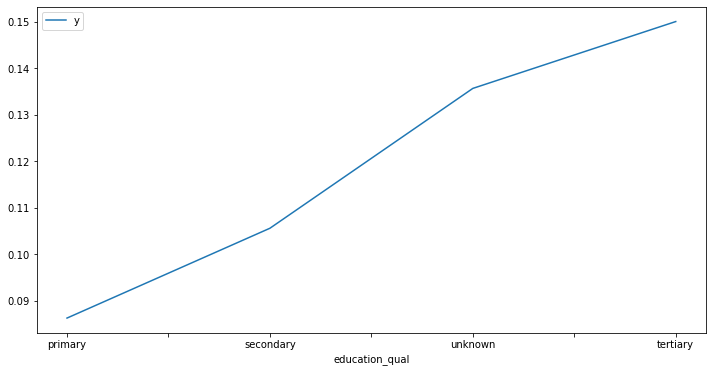

In [19]:
plt.figure(figsize=(12, 6)) 
print(df.groupby('education_qual')['y'].mean().sort_values())
df.groupby('education_qual')['y'].mean().sort_values().reset_index().plot.line(x='education_qual', y='y', ax=plt.gca())

In [20]:
# using plot we can able to see the tertiary educated people are more likely to buy insurance

In [21]:
# education_qual column label encoding
df['education_qual'] = df['education_qual'].map({'primary':1, 'secondary':2, 'unknown':3, 'tertiary': 4})

call_type
unknown      0.040716
telephone    0.134205
cellular     0.149204
Name: y, dtype: float64


<AxesSubplot:xlabel='call_type'>

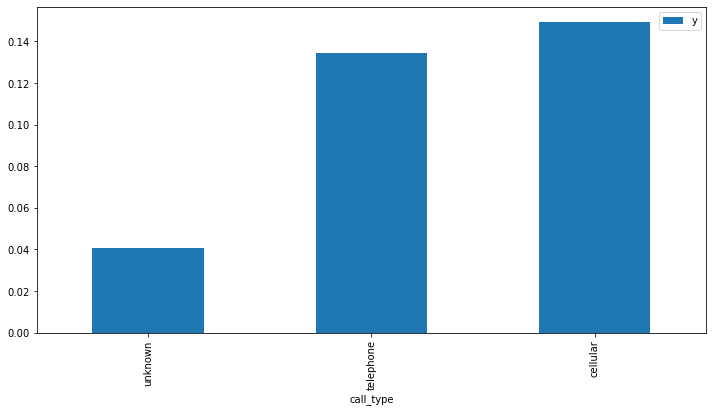

In [22]:
plt.figure(figsize=(12, 6)) 
print(df.groupby('call_type')['y'].mean().sort_values())
df.groupby('call_type')['y'].mean().sort_values().reset_index().plot.bar(x='call_type', y='y', ax=plt.gca())

In [23]:
# using bar plot we can able to see the cellular call type contacted people are more likely to buy insurance

In [24]:
# education_qual column label encoding
df['call_type'] = df['call_type'].map({'unknown':1, 'telephone':2, 'cellular':3})

y
1    15.158253
0    15.892825
Name: day, dtype: float64


<AxesSubplot:xlabel='y'>

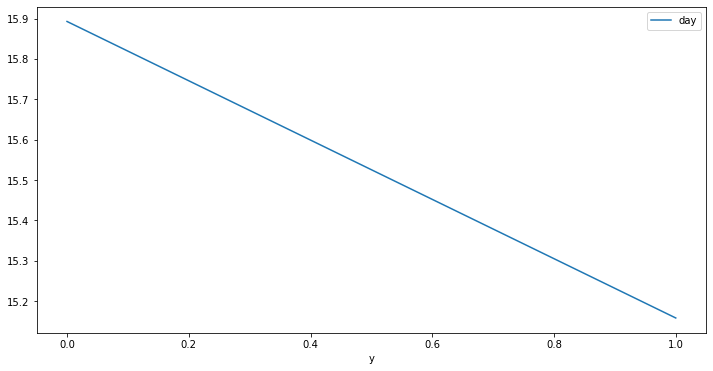

In [25]:
plt.figure(figsize=(12, 6)) 
print(df.groupby('y')['day'].mean().sort_values())
df.groupby('y')['day'].mean().sort_values().reset_index().plot.line(x='y', y='day', ax=plt.gca())

In [26]:
# average people are buying the inusrance before 15.2

mon
may    0.067199
jul    0.090949
jan    0.101212
nov    0.101511
jun    0.102266
aug    0.110168
feb    0.166478
apr    0.196794
oct    0.437669
sep    0.464594
dec    0.467290
mar    0.519916
Name: y, dtype: float64


<AxesSubplot:xlabel='mon'>

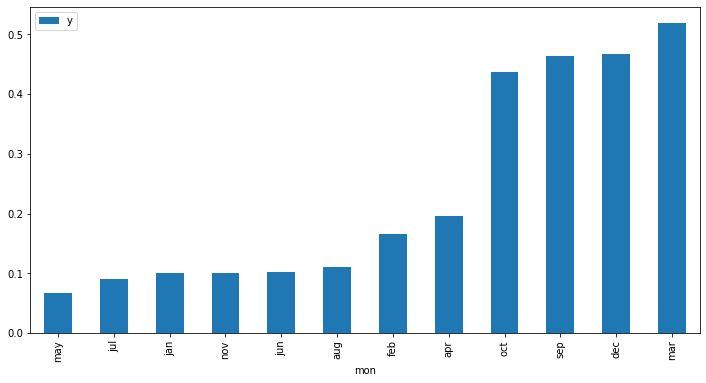

In [27]:
plt.figure(figsize=(12, 6)) 
print(df.groupby('mon')['y'].mean().sort_values())
df.groupby('mon')['y'].mean().sort_values().reset_index().plot.bar(x='mon', y='y', ax=plt.gca())

In [28]:
# most of the people are likely to buy insurance on march month

In [29]:
# mon column label encoding
df['mon'] = df['mon'].map({'may':1, 'jul':2, 'jan':3, 'nov':4, 'jun':5, 'aug':6,
                           'feb':7, 'apr':8, 'oct':9, 'sep':10, 'dec':11, 'mar':12,})

y
0    209.822352
1    424.640953
Name: dur, dtype: float64


<AxesSubplot:xlabel='y'>

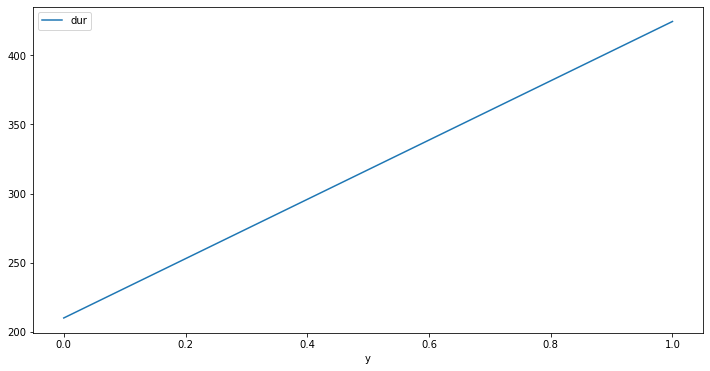

In [30]:
plt.figure(figsize=(12, 6)) 
print(df.groupby('y')['dur'].mean().sort_values())
df.groupby('y')['dur'].mean().sort_values().reset_index().plot.line(x='y', y='dur', ax=plt.gca())

In [31]:
# average people of speaking more than 424 seconds, are having high chance of buying insurance

y
1    2.022689
0    2.441202
Name: num_calls, dtype: float64


<AxesSubplot:xlabel='y'>

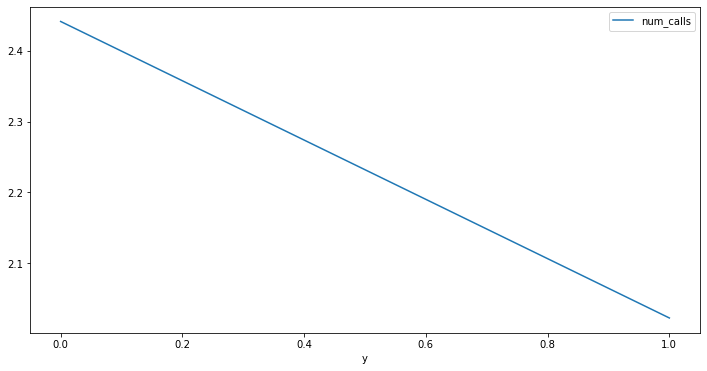

In [32]:
plt.figure(figsize=(12, 6)) 
print(df.groupby('y')['num_calls'].mean().sort_values())
df.groupby('y')['num_calls'].mean().sort_values().reset_index().plot.line(x='y', y='num_calls', ax=plt.gca())

prev_outcome
unknown    0.091630
failure    0.126097
other      0.166848
success    0.647253
Name: y, dtype: float64


<AxesSubplot:xlabel='prev_outcome'>

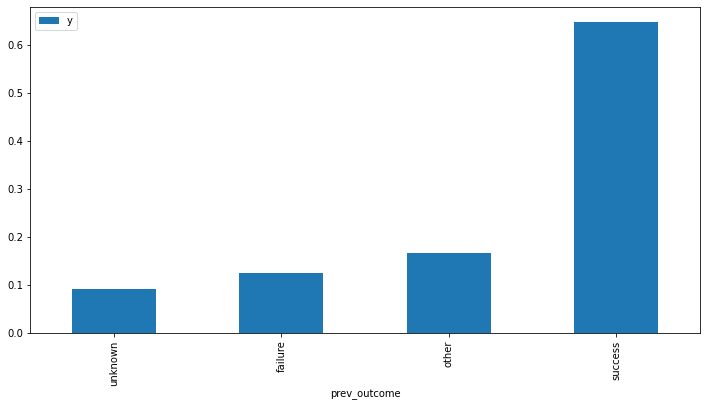

In [33]:
plt.figure(figsize=(12, 6)) 
print(df.groupby('prev_outcome')['y'].mean().sort_values())
df.groupby('prev_outcome')['y'].mean().sort_values().reset_index().plot.bar(x='prev_outcome', y='y', ax=plt.gca())

In [34]:
# on previous call people who are said i will bu the insurance are getting more chance of buying insurance

In [35]:
# prev_outcome column label encoding
df['prev_outcome'] = df['prev_outcome'].map({'unknown':1, 'failure':2, 'other':3, 'success':4})

In [36]:
# checking data is balanced or not
df['y'].value_counts()

0    39916
1     5289
Name: y, dtype: int64

In [37]:
# it is a imbalanced data, so we have to balance the data
# using smote we are going to balance the data
featureColumns= df.drop(columns=["y"],axis=1)
targetColumn= df["y"]
featureColumns_new,targetColumn_new= SMOTETomek().fit_resample(featureColumns,targetColumn)

In [38]:
targetColumn_new.value_counts()

0    39755
1    39755
Name: y, dtype: int64

In [39]:
# checking the skeweness in the data
def plot(df,column):
    #distplot
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.distplot(df[column], kde=True, color='skyblue')
    plt.title("distplot for"+" "+column)

    #histogram plot

    plt.subplot(1,3,2)
    sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
    plt.title("histogram plot for"+" "+column)

    #boxplot

    plt.subplot(1,3,3)
    sns.boxplot(x=df[column])
    plt.title("Box plot for"+" "+column)

In [40]:
skewed_columns=['age', 'job', 'marital', 'education_qual',
                'call_type', 'day', 'mon', 'dur', 'num_calls',
                'prev_outcome', 'y']

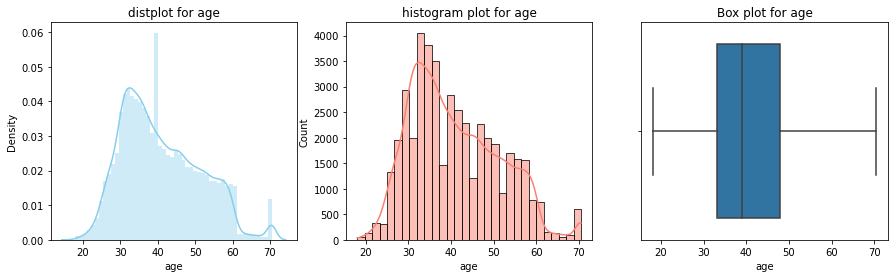

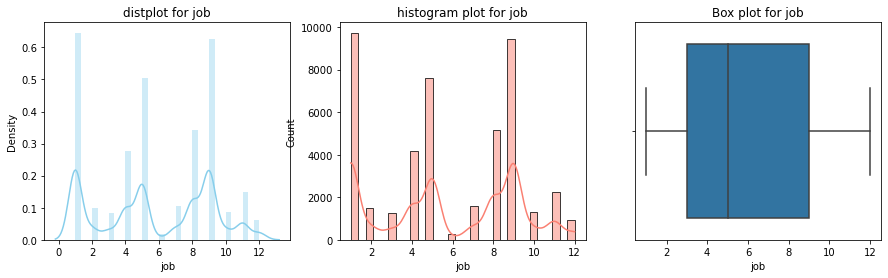

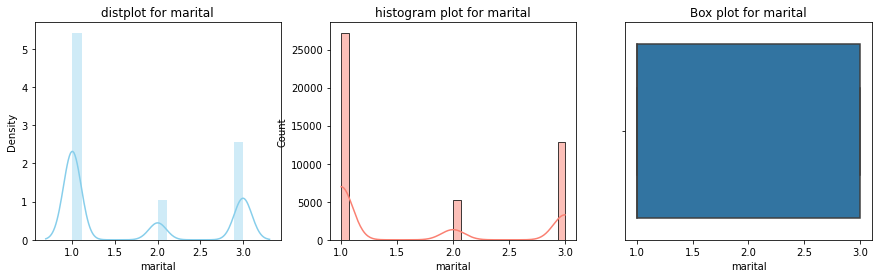

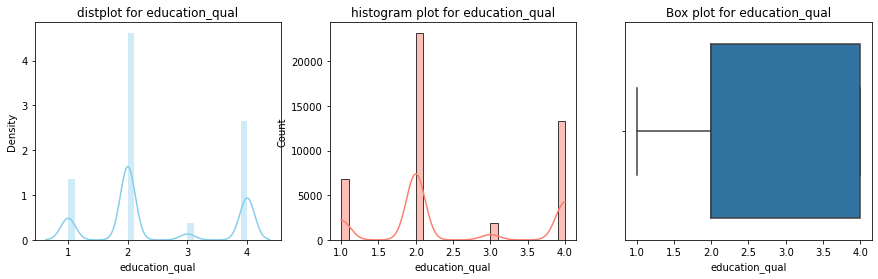

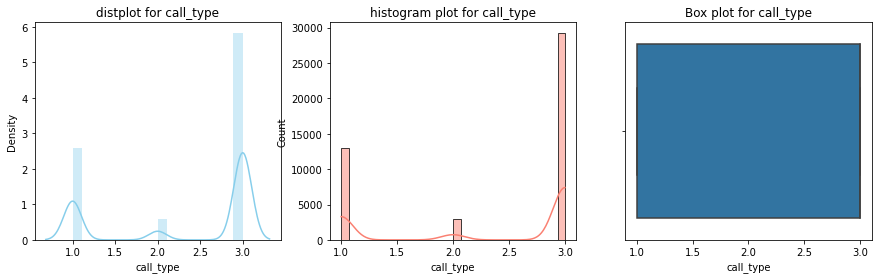

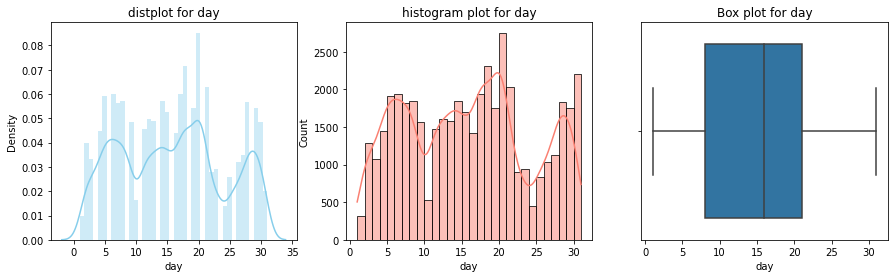

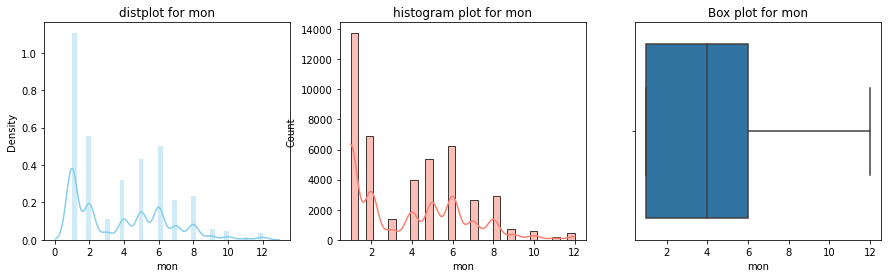

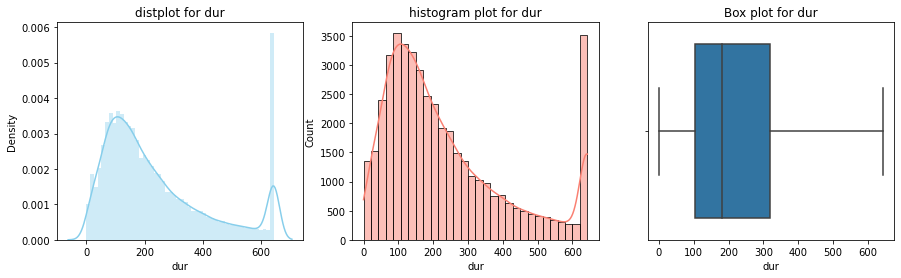

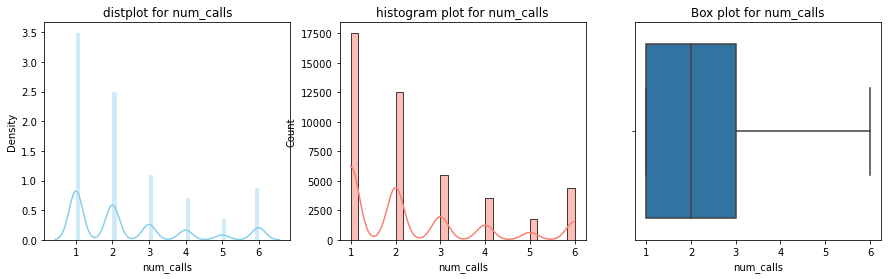

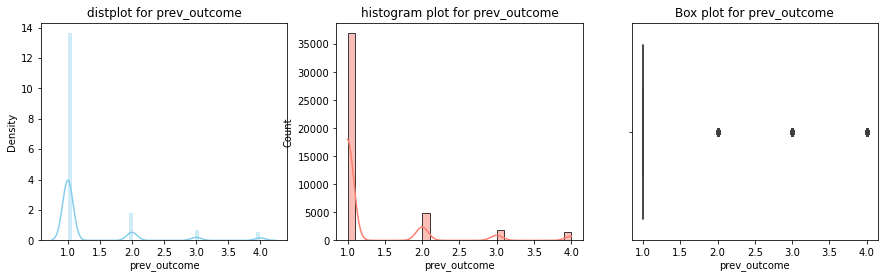

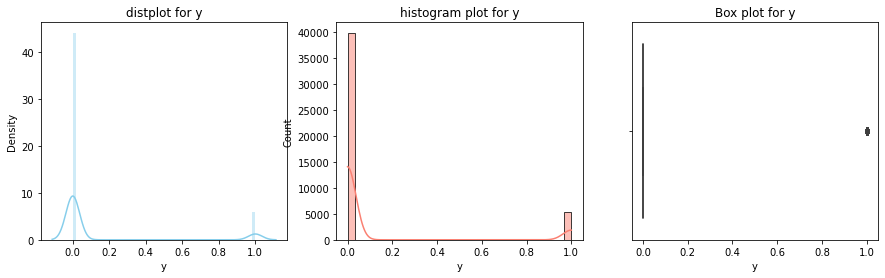

In [41]:
for i in skewed_columns:
    try:
        plot(df, i)
    except Exception as e:
        pass

In [42]:
# we don't have skeweness in the data

In [43]:
def accuracy_F1_checking(featureColumns, targetColumn, algorithm):
    #train test splitting
    featureColumns_train, featureColumns_test, targetColumn_train, targetColumn_test= train_test_split(featureColumns, targetColumn, test_size= 0.2, random_state=42)

    model= algorithm().fit(featureColumns_train, targetColumn_train)

    targetColumn_pred_train= model.predict(featureColumns_train)
    targetColumn_pred_test= model.predict(featureColumns_test)

    #checking the f1_score
    f1_train = f1_score(targetColumn_train, targetColumn_pred_train)
    f1_test = f1_score(targetColumn_test, targetColumn_pred_test)
    
    #checking the accuracy_score
    accuracy_train= accuracy_score(targetColumn_train, targetColumn_pred_train)
    accuracy_test= accuracy_score(targetColumn_test, targetColumn_pred_test)

    metrics={"Algorithm": algorithm.__name__,
             "F1_Score_Train": f1_train,
             "F1_Score_Test": f1_test,
           "Accuracy_Score_Train": accuracy_train,
           "Accuracy_Score_Test": accuracy_test}
    return metrics

In [44]:
print(accuracy_F1_checking(featureColumns_new,targetColumn_new,DecisionTreeClassifier))
print(accuracy_F1_checking(featureColumns_new,targetColumn_new,RandomForestClassifier))
print(accuracy_F1_checking(featureColumns_new,targetColumn_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'F1_Score_Train': 0.9999057018922487, 'F1_Score_Test': 0.9033337464369812, 'Accuracy_Score_Train': 0.9999056722424853, 'Accuracy_Score_Test': 0.9018991321846309}
{'Algorithm': 'RandomForestClassifier', 'F1_Score_Train': 0.9999057078199648, 'F1_Score_Test': 0.9352020385875501, 'Accuracy_Score_Train': 0.9999056722424853, 'Accuracy_Score_Test': 0.9328386366494781}
{'Algorithm': 'XGBClassifier', 'F1_Score_Train': 0.9470497834489825, 'F1_Score_Test': 0.9301518438177874, 'Accuracy_Score_Train': 0.9463746698528487, 'Accuracy_Score_Test': 0.9291284115205635}


In [45]:
# our decision tree and random forest model is overfiting in training, so we are going to hanle the ovefit

In [46]:
featureColumns_train, featureColumns_test, targetColumn_train, targetColumn_test= train_test_split(featureColumns_new, targetColumn_new, test_size= 0.2, random_state=42)

In [47]:
# checking the right parameter for max_depth, using cross val score for decision tree classifier algorithm to handle the overfiting
for depth in [1,2,3,4,5,6,7,8,9,10]:
    dtcModel = DecisionTreeClassifier(max_depth = depth)
    dtcModel.fit(featureColumns_train, targetColumn_train)
    trainingScore = dtcModel.score(featureColumns_train, targetColumn_train)
    crossValidation = np.mean(cross_val_score(dtcModel, featureColumns_test, targetColumn_test, cv=10))
    print(f'depth is {depth} Training score is {trainingScore} Cross Validation Score {crossValidation}')

depth is 1 Training score is 0.7203810841403597 Cross Validation Score 0.7216715882183193
depth is 2 Training score is 0.7252861275311282 Cross Validation Score 0.7261350995576532
depth is 3 Training score is 0.782495912463841 Cross Validation Score 0.781788598602991
depth is 4 Training score is 0.8048515909948434 Cross Validation Score 0.7909702769904614
depth is 5 Training score is 0.8156521192302855 Cross Validation Score 0.8024145250999133
depth is 6 Training score is 0.8200069173688844 Cross Validation Score 0.8182615656463834
depth is 7 Training score is 0.8369073072569488 Cross Validation Score 0.8315305432681475
depth is 8 Training score is 0.8550025154068671 Cross Validation Score 0.8382599053638984
depth is 9 Training score is 0.8662432398440447 Cross Validation Score 0.8419075459838952
depth is 10 Training score is 0.8777197836750095 Cross Validation Score 0.8436046313975231


In [50]:
# depth 10 is the right parameter for max_depth
dtcModel = DecisionTreeClassifier(max_depth = 10)
dtcModel.fit(featureColumns_train, targetColumn_train)
targetColumn_pred_train= dtcModel.predict(featureColumns_train)
targetColumn_pred_test= dtcModel.predict(featureColumns_test)
f1_train = f1_score(targetColumn_train, targetColumn_pred_train)
f1_test = f1_score(targetColumn_test, targetColumn_pred_test)
mse = mean_squared_error(targetColumn_test, targetColumn_pred_test)
print('f1_Score_training', f1_train)
print('f1_Score_test', f1_test)
print('mse', mse)

f1_Score_training 0.8810106448060687
f1_Score_test 0.8643375403938784
mse 0.13991950698025404


In [51]:
# using random search, finding the best parameter for random forest classifier algorithm to handle the overfiting
# parameters = {
#     "max_depth": [2, 5, 10],
#     "min_samples_split": [2, 5,10],
#     "min_samples_leaf": [2, 4, 6],
#     "max_features": ['sqrt', 'log2'],
#     "n_estimators": [10, 20, 50]  # You can add more parameters as needed
# }

# random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=parameters, 
#     n_iter=100,  # Number of parameter settings sampled
#     cv=5,  # Number of cross-validation folds
#     n_jobs=-1,  # Use all available cores
#     random_state=42,  # For reproducibility
#     verbose=2  # For logging progress
# )

# random_search.fit(featureColumns_train,targetColumn_train)

In [52]:
# random_search.best_params_

In [53]:
# random_search.best_score_

In [54]:
# Using the best param we are going to hyper-tune our model
featureColumns_train, featureColumns_test, targetColumn_train, targetColumn_test= train_test_split(featureColumns_new, targetColumn_new, test_size= 0.2, random_state=42)

model= RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2, min_samples_split=5, n_estimators=50).fit(featureColumns_train, targetColumn_train)

targetColumn_pred_train= model.predict(featureColumns_train)
targetColumn_pred_test= model.predict(featureColumns_test)

#checking the f1_score
f1_train = f1_score(targetColumn_train, targetColumn_pred_train)
f1_test = f1_score(targetColumn_test, targetColumn_pred_test)

In [55]:
print('f1_train', f1_train)
print('f1_test', f1_test)

f1_train 0.8924148490625515
f1_test 0.8827223252197836


In [56]:
# overfiting in random forest model training data as been adjusted, after hyper-tuned the parameters